RANTEST performs a randomisation test to compare two independent samples.  According to the null hypothesis of    no-difference, each outcome would have been the same regardless of which group the individual happened to be allocated to.  Therefore all N = n1 + n2 observations are pooled and, as in the actual experiment, divided at random into groups of size n1 and n2.  The fraction of randomisations that gives rise to a difference between the groups at least as large as that observed gives the P value.

In the binomial case, in which the measurement is the fraction of 'successes' in each sample (say r1 out of n1, and r2 out of n2) a 'success' is given a score of 1, 'failure' scores 0.
Randomisation test on binomial data could be done using as criterion: 
(1) number of successes in set 1 (r1) or 
(2) difference between the p=r/n values.
Both criteria give the same one-tail P value. Use of r1 as criterion is the direct Monte Carlo equivalent of summing the the exact Fisher test probabilities for the observed 2x2 table with those for all tables that depart further from the null hypothesis in the observed direction. A 2-tail probablilty can be found by doubling the one-tail value, at least if the displayed distribution is symmetrical. Use of (p1-p2) as criterion gives both one and two-tail     probabilities directly by seeing how many random allocations of the observations to groups of size n1 and n2 produce and absolute value of (p1-p2) at least as big as that observed.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from dcstats.rantest import RantestContinuous
from dcstats.basic_stats import TTestContinuous
from dcstats.Hedges import Hedges_d

In [3]:
# Samples from treatment T1 and T2
T1 = [100, 108, 119, 127, 132, 135, 136]#, 164]
T2 = [122, 130, 138, 142, 152, 154, 176]
are_paired = False

### Calculate basic statistics

In [4]:
ttc = TTestContinuous(T1, T2, are_paired)

In [5]:
print(ttc)

n 		 7      	  7
Mean 		 122.428571    	  144.857143
SD 		 14.010200     	  17.808505
SDM 		 5.295358     	  6.730982
95% confidence intervals:
lower 		 112.049670    	  131.664418
upper 		 132.807473    	  158.049868

 Mean difference (dbar) = 	 -22.428571
  s(d) = 	 8.100558 	 s(dbar) = 	 3.061723

 Two-sample unpaired Students t-test:
 t = 	 -2.618850
 two tail P = 	 0.022432


### Calculate Hedges statistics

In [6]:
#calculation of hedges d and approximate 95% confidence intervals
#not tested against known values yet AP 170518
hedges_calculation = Hedges_d(T1, T2)
hedges_calculation.hedges_d_unbiased()
#paired needed for degrees of freedom
lowerCI, upperCI = hedges_calculation.bootstrap_CI(5000)
#option to have bootstrap calculated CIs should go here
print(hedges_calculation)



Effect size
  Hedges unbiased d = 	 1.310483
  approximate 95% confidence intervals 
  upper 95% CI =	 2.406342
  lower 95% CI =	 0.638363


### Run randomisation tests

In [7]:
nran = 50000
rnt = RantestContinuous(T1, T2, are_paired)    
rnt.run_rantest(nran)

In [8]:
print(rnt)



   Rantest:  50000 randomisations
 P values for difference between means 
  greater than or equal to observed: P = 	 0.990460
  less than or equal to observed: P = 	 0.010620
  greater than or equal in absolute value to observed: P = 	 0.021000
  Number equal to observed = 54 (P= 0.001080)
  Number equal in absolute value to observed = 119 (P= 0.002380)


Red line: mean difference


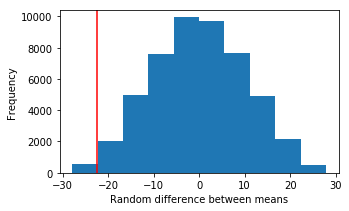

In [9]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(rnt.randiff, 10)
ax.axvline(x=rnt.dbar, color='r')
ax.set_ylabel("Frequency")
ax.set_xlabel('Random difference between means')
print('Red line: mean difference')

What id measurements were paired?

In [10]:
ttc = TTestContinuous(T1, T2, True)

In [11]:
print(ttc)

n 		 7      	  7
Mean 		 122.428571    	  144.857143
SD 		 14.010200     	  17.808505
SDM 		 5.295358     	  6.730982
95% confidence intervals:
lower 		 112.049670    	  131.664418
upper 		 132.807473    	  158.049868

 Mean difference (dbar) = 	 -22.428571
  s(d) = 	 8.100558 	 s(dbar) = 	 3.061723

 Paired Students t-test:
  t(6)= 	 dbar / s(dbar) 	 = 	 -7.325473
  two tail P =	 0.000331


In [12]:
nran = 50000
rnt = RantestContinuous(T1, T2, True)    
rnt.run_rantest(nran)

In [13]:
print(rnt)



   Rantest:  50000 randomisations
 P values for difference between means 
  greater than or equal to observed: P = 	 1.000000
  less than or equal to observed: P = 	 0.008020
  greater than or equal in absolute value to observed: P = 	 0.015120
  Number equal to observed = 401 (P= 0.008020)
  Number equal in absolute value to observed = 756 (P= 0.015120)


Red line: mean difference


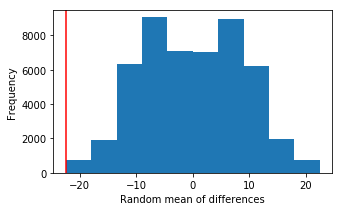

In [14]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(rnt.randiff, 10)
ax.axvline(x=rnt.dbar, color='r')
ax.set_ylabel("Frequency")
ax.set_xlabel('Random mean of differences')
print('Red line: mean difference')